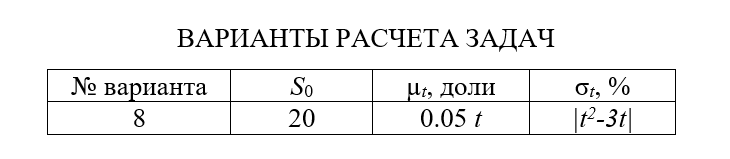

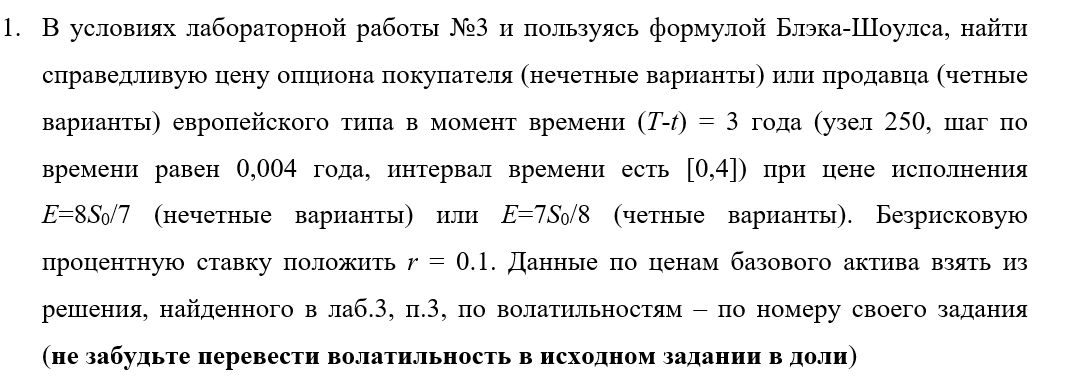

In [149]:
import numpy as np
from numpy import  log,sqrt,exp
from scipy.stats import norm

def call(S, K, T, t, sigma, r, q):
    d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
    d2 = d1 - sigma*sqrt(T-t)
    return S*exp(-q*(T-t))*norm.cdf(d1) - K*exp(-r*(T-t))*norm.cdf(d2)

def put(S, K, T, t, sigma, r, q):
    d1 = (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
    d2 = d1 - sigma*sqrt(T-t)
    return -S*exp(-q*(T-t))*norm.cdf(-d1) + K*exp(-r*(T-t))*norm.cdf(-d2)

In [150]:
def sigma(t):
    return np.absolute(t**2-3*t)/100
def mu(t):
    return 0.05*t

In [151]:
S0=25
T=4
t=1
r=0.1
q=0
E=7*S0/8
print(round(put(S0,E,T,t, sigma(t),r,q),5))

0.0


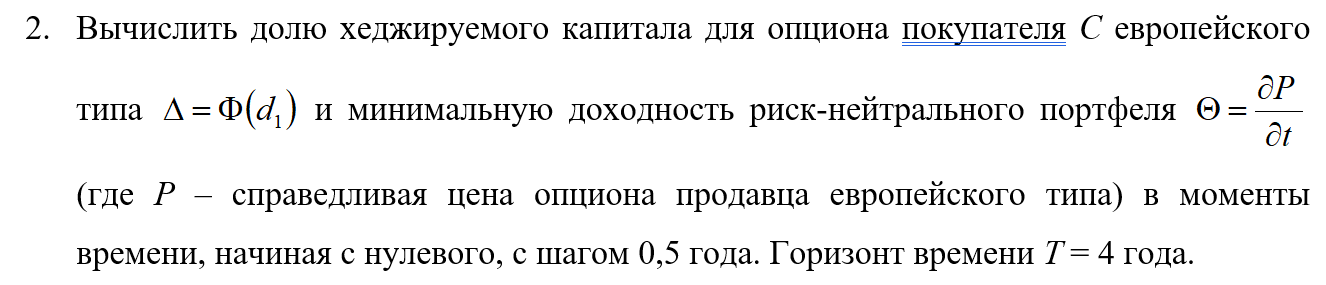

In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
import numpy as np
import scipy

def d1(S,K,r,q,sigma,T,t):
    return (log(S/K)+(r-q+sigma*sigma/2)*(T-t))/(sigma*sqrt(T-t))
    
def d2(S,K,r,q,sigma,T,t):
    d_1=d1(S,K,r,q,sigma,T,t)
    return d_1 - sigma*sqrt(T-t)
S=[20.0, 20.2731, 20.4614, 21.3216, 22.1529, 22.8954, 25.2405, 27.6266, 29.9381]
T=4
t = np.arange(0,4.5,0.5)
t[8]=3.99999
delta = [scipy.stats.norm.cdf(d1(S[i],E,r,q,sigma(t[i]),T,t[i])) for i in range(len(t))]
tetta = [-sigma(t[i])*S[i]/(2*np.sqrt(T-t[i]))*scipy.stats.norm.pdf(d1(S[i],E,r,q,sigma(t[i]),T,t[i])) - r*E*np.exp(-r*(T-t[i]))*scipy.stats.norm.cdf(-d2(S[i],E,r,q,sigma(t[i]),T,t[i])) for i in range(len(t))]

In [154]:
print(np.round(delta,4))
print(np.round(tetta,4))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]


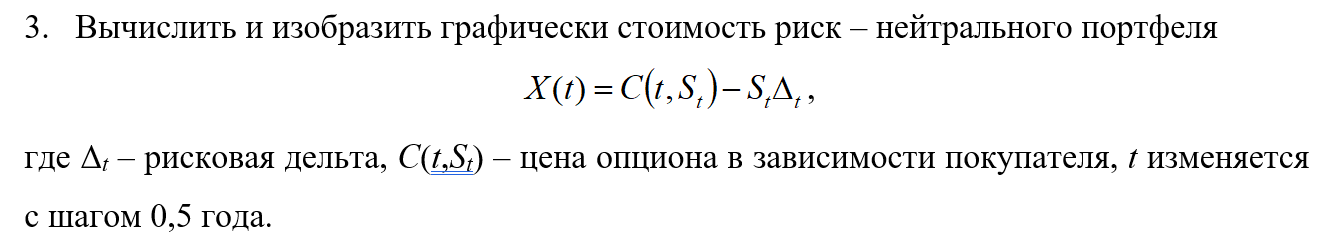

[-14.66325100702961, -15.415051962596856, -16.20539857725963, -17.036267126969378, -17.909735223580295, -18.82798698429814, -19.793318519536616, -20.808143660953117, -21.874978125010937]


Text(0, 0.5, '')

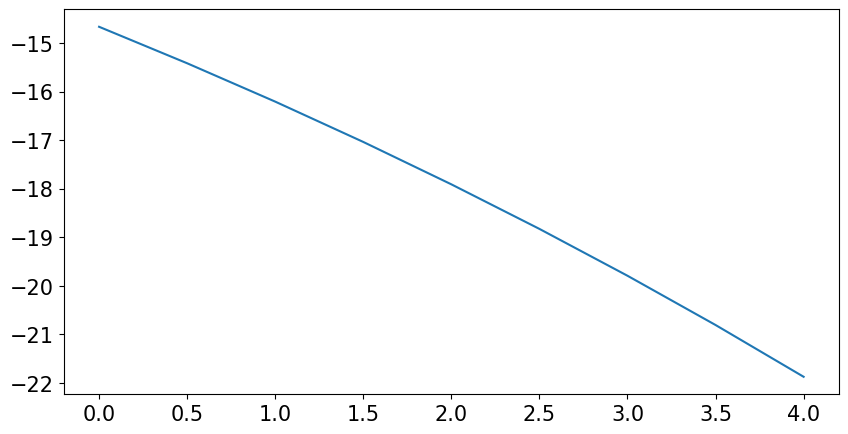

In [155]:
import matplotlib.pyplot as plt
X = [call(S[i], E, T, t[i], sigma(t[i]), r, q) - S[i]*delta[i] for i in range(len(t))]
print(X)
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(t,X)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')

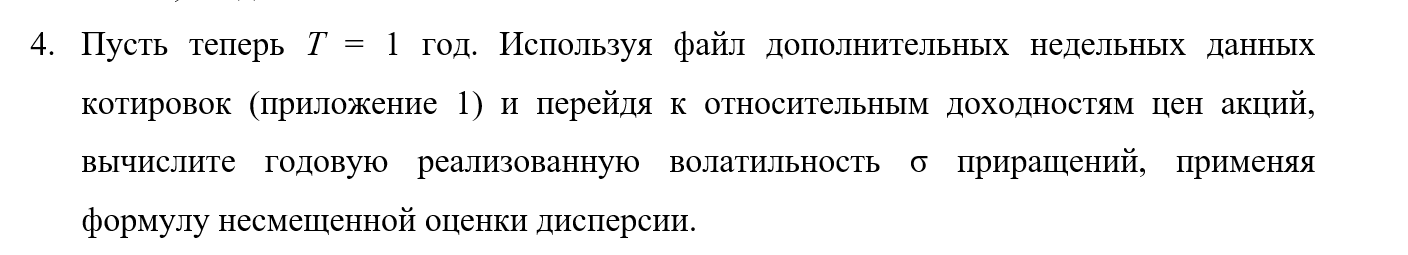

In [156]:
T=1
X=[50.00,49.67,49.63,49.74,50.22,48.36,48.74,50.08,49.63,48.39,48.19,48.95,48.57,48.34,49.02,48.85,49.45,49.46,48.48,47.87,46.51,48.55,47.96,48.26,47.74,48.80,48.31,49.16,48.18,47.65,46.19,46.17,46.05,46.28,44.47,44.02,43.00,42.59,43.23,43.52,45.20,46.11,46.24,46.50,45.64,46.90,46.43,46.67,46.91,47.64,48.21]
X_otn = np.array([(X[i-1]-X[i])/X[i-1] for i in range(1,len(X))])
m = X_otn.mean()
vol  = np.sqrt(np.sum((X_otn - m)**2)/(len(X_otn)-1)*52)
vol

0.12955315944405602

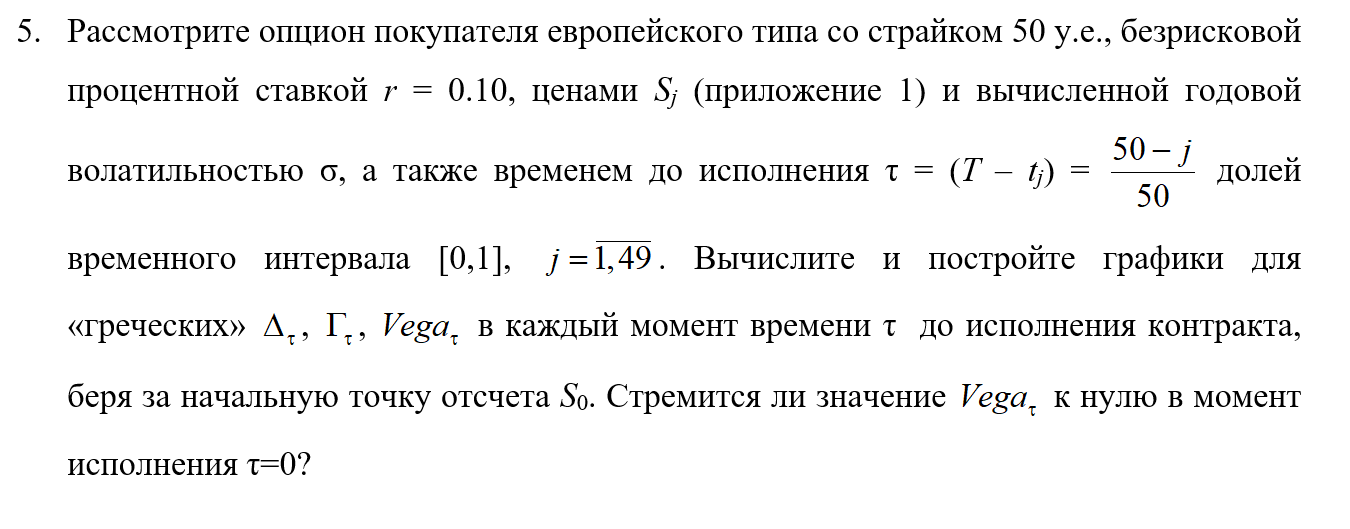

In [157]:
E=50
r=0.1
X
tau = np.array([(50-j)/50 for j in range(1,50)])
tau

array([0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82, 0.8 , 0.78,
       0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62, 0.6 , 0.58, 0.56,
       0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 , 0.38, 0.36, 0.34,
       0.32, 0.3 , 0.28, 0.26, 0.24, 0.22, 0.2 , 0.18, 0.16, 0.14, 0.12,
       0.1 , 0.08, 0.06, 0.04, 0.02])

In [168]:
import numpy as np
from scipy.stats import norm

def d1(S,K,r,sigma,tau):
    return (log(S/E)+(r+(sigma**2)/2)*tau)/(sigma*sqrt(tau))

def D(S, K, tau, sigma, r):
  return norm.cdf(d1(S,K,r,sigma,tau))

def G(S,K,tau,sigma,r):
  return norm.pdf(d1(S,K,r,sigma,tau))*(1/(S*sigma*np.sqrt(tau)))
    
def V(S,K,tau,sigma,r):
  return S*np.sqrt(tau)*norm.pdf(d1(S,K,r,sigma,tau))


delta = [D(X[i+1], E, tau[i], vol, r) for i in range(len(tau))]
Gamma = [G(X[i+1], E, tau[i], vol, r) for i in range(len(tau))]
Vega = [V(X[i+1], E, tau[i], vol, r) for i in range(len(tau))]

print("Delta: ",np.round(np.array(delta),3))
print("Gamma: ",np.round(np.array(Gamma),3))
print("Vega:  ",np.round(np.array(Vega),3))

Delta:  [0.781 0.777 0.779 0.799 0.699 0.717 0.785 0.759 0.684 0.666 0.71  0.682
 0.662 0.702 0.686 0.721 0.718 0.645 0.592 0.471 0.633 0.578 0.596 0.543
 0.628 0.578 0.646 0.549 0.488 0.331 0.315 0.289 0.296 0.13  0.091 0.039
 0.023 0.03  0.029 0.086 0.132 0.12  0.118 0.041 0.097 0.037 0.025 0.011
 0.006]
Gamma:  [0.046 0.047 0.047 0.045 0.059 0.057 0.049 0.053 0.063 0.065 0.061 0.065
 0.068 0.064 0.067 0.064 0.065 0.074 0.08  0.085 0.079 0.084 0.084 0.089
 0.085 0.09  0.086 0.096 0.1   0.096 0.096 0.095 0.099 0.065 0.052 0.029
 0.019 0.025 0.025 0.06  0.084 0.084 0.088 0.043 0.089 0.048 0.039 0.024
 0.019]
Vega:   [14.509 14.52  14.307 13.529 15.968 15.463 13.57  14.161 15.589 15.676
 14.798 15.108 15.21  14.421 14.494 13.698 13.576 14.441 14.638 14.334
 13.927 14.044 13.737 13.654 13.052 13.097 12.4   12.653 12.314 10.588
 10.108  9.44   9.327  5.324  3.936  1.938  1.169  1.437  1.36   3.165
  4.175  3.704  3.443  1.38   2.549  1.065  0.659  0.269  0.112]


Text(0, 0.5, '')

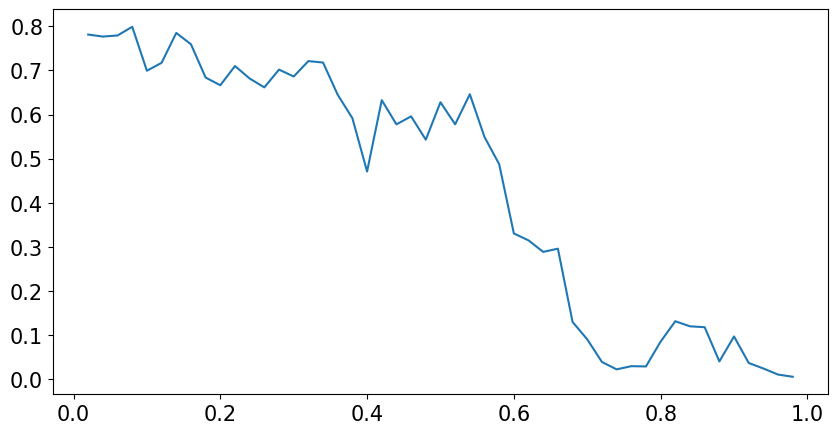

In [159]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(tau,list(reversed(delta)))
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')

Text(0, 0.5, '')

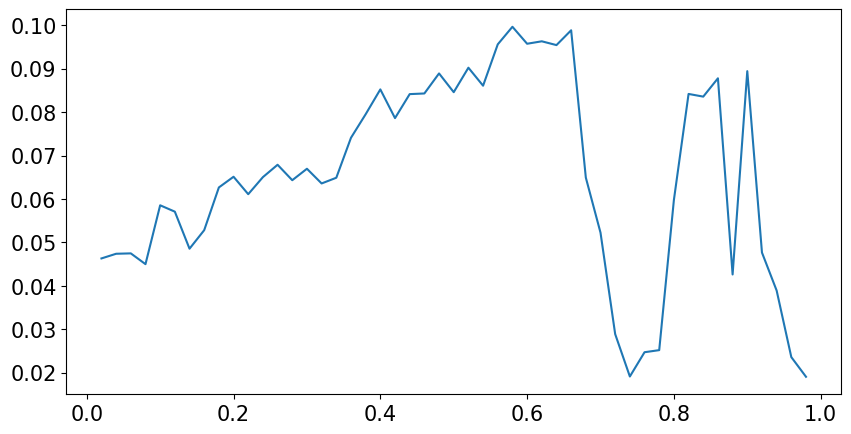

In [160]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(tau,list(reversed(Gamma)))
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')

Text(0, 0.5, '')

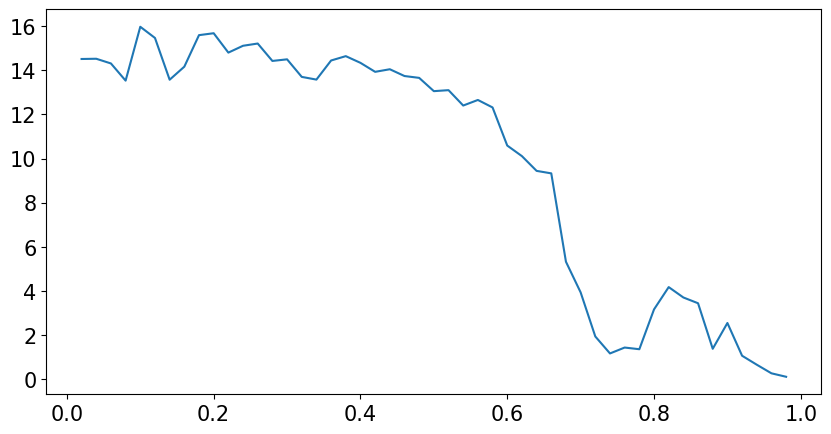

In [161]:
fig, axs = plt.subplots(figsize=(10, 5))
plt.plot(tau,list(reversed(Vega)))
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
axs.set_xlabel('')
axs.set_ylabel('')